In [19]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision
import torch
import os
import pandas as pd

# import torch
# from torchvision import datasets
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset
# from torchvision.transforms import ToTensor
# import matplotlib.pyplot as plt
# from torch.utils.data import DataLoader
from torch import nn

In [20]:
ls

1_ANN_CNN.ipynb  img_dir/  labels.csv  test.ipynb  turtle.jpg


tensor([[  0., 255., 255.,  ..., 255., 255., 255.],
        [255.,   0., 255.,  ..., 255., 255., 255.],
        [255., 255.,   0.,  ..., 255., 255., 255.],
        ...,
        [255., 255., 255.,  ...,   0., 255., 255.],
        [255., 255., 255.,  ..., 255.,   0., 255.],
        [255., 255., 255.,  ..., 255., 255.,   0.]])
torch.Size([50, 50])


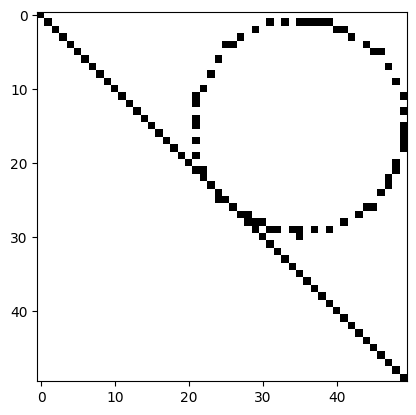

In [21]:
gen_img = torch.ones([50, 50])*255

# Straight Line
for i in range(50):
    for j in range(50):
        if i == j:
            gen_img[i][j] = 0

# Circle
radius = torch.tensor(15)
center = 25

for i in range(90):
    # x = r * cos(θ)
    # y = r * sin(θ)

    tensor_i = torch.tensor(i)
    x = radius * torch.cos(tensor_i)
    y = radius * torch.sin(tensor_i)

    x = x.int()
    y = y.int()

    gen_img[x+radius][y-radius] = 0

print(gen_img)
print(gen_img.shape)
plt.imshow(gen_img, cmap="gray")
plt.show()

In [22]:
img = read_image('./turtle.jpg')

print(f"Image shape before converting to grayscle: {img.shape}")
print(img.type)

# RGB to Grayscale
img = torchvision.transforms.functional.rgb_to_grayscale(img, 1)
print(f"Image shape after converting to grayscle: {img.shape}")


print(f"Image before squeezing: {img}")
img = img.squeeze() # Removes channel - [1, W, H] -> [W, H], all input of size 1 removed
#img = img.float()/255
print(f"Image after squeezing: {img}")
print(f"Image shape after squeezing: {img.shape}")




Image shape before converting to grayscle: torch.Size([3, 50, 50])
<built-in method type of Tensor object at 0x7ffabea80860>
Image shape after converting to grayscle: torch.Size([1, 50, 50])
Image before squeezing: tensor([[[75, 75, 75,  ..., 72, 69, 69],
         [75, 75, 75,  ..., 71, 68, 68],
         [75, 75, 75,  ..., 69, 69, 69],
         ...,
         [49, 47, 49,  ..., 39, 35, 35],
         [47, 48, 48,  ..., 37, 36, 36],
         [46, 48, 48,  ..., 38, 37, 36]]], dtype=torch.uint8)
Image after squeezing: tensor([[75, 75, 75,  ..., 72, 69, 69],
        [75, 75, 75,  ..., 71, 68, 68],
        [75, 75, 75,  ..., 69, 69, 69],
        ...,
        [49, 47, 49,  ..., 39, 35, 35],
        [47, 48, 48,  ..., 37, 36, 36],
        [46, 48, 48,  ..., 38, 37, 36]], dtype=torch.uint8)
Image shape after squeezing: torch.Size([50, 50])


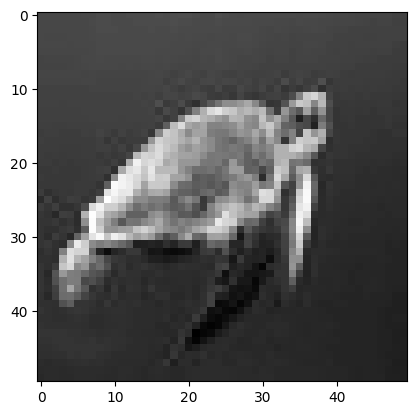

In [23]:
plt.imshow(img, cmap="gray")
plt.show()

## A Simple Neural Network

In [24]:
x1 = torch.randint(1, 100, (100,)) #min, max, size
x2 = torch.randint(1, 100, (100,))

y = (2*x2+5*x1) # we need to find this formula
#y = [(torch.square(y))*111 for y in y] 

data = {'Feature 1': x1, 'Feature 2': x2, 'Y': y}
df = pd.DataFrame(data)

print(df)


    Feature 1  Feature 2    Y
0           1         32   69
1          61         77  459
2          92         95  650
3          72         25  410
4          50         75  400
..        ...        ...  ...
95         57         63  411
96         97         83  651
97         74         56  482
98         92         33  526
99         20         47  194

[100 rows x 3 columns]


In [25]:
#loc[#Rows, #Columns], loc is label-based
#iloc[:, index], iloc is integer-based

#print(df.loc[0]) # Gives the entire row

#Fetch row as well as columns
# print(df.loc[0:5, "Feature 2"])

print(f" Feature 1: {df.iloc[0, 0]}")
print(f" Feature 2: {df.iloc[0, 1]}")


 Feature 1: 1
 Feature 2: 32


In [26]:
# Train, Validate, Test split

train_data = df.iloc[0:60, :]
# print(train_data)
validate_data = df.iloc[60:80, :]
test_data = df.iloc[80:100, :]


In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [28]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)


In [29]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([10, 2]) | Values : tensor([[-0.4276,  0.1419],
        [ 0.5083,  0.0937]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([10]) | Values : tensor([0.6448, 0.1086], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([5, 10]) | Values : tensor([[-0.1530,  0.1358,  0.2989, -0.1555,  0.3022,  0.0703, -0.2958, -0.2653,
         -0.1768, -0.1261],
        [-0.1424, -0.2270, -0.0463,  0.1583,  0.2762, -0.1619, -0.2065, -0.2083,
          0.2546, -0.3022]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([5]) | Values : tensor([-0.1144,  0.2679], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([1, 5]) | Values : tensor([[ 0.0467,  0.0626,  0.2498, -0.3979, -0.2949]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.bias | Size: torch.Size([1]) | Values : tensor([0.4284], grad_fn=<SliceBackward0>) 



In [30]:
# Change hyperparameters only for Validation dataset

learning_rate = 1e-3
#batch_size = 2
epochs = 100

In [31]:
# Initialize the loss function
loss_fn = nn.MSELoss()

# Use Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [32]:

# range_x1 = torch.max(x1) - torch.min(x1)
# normalized_x1 = [(x - torch.min(x1)) / range_x1 for x in x1]     
# print(normalized_x1)

# range_x2 = torch.max(x2) - torch.min(x2)
# normalized_x2 = [(x - torch.min(x2)) / range_x2 for x in x2]     
# print(normalized_x2)

In [33]:
def train_loop():
    size = len(train_data)
    #print(size)

    for i in range(size): 
        
        feature1 = torch.tensor(train_data.iloc[i, 0]).float()
        feature2 = torch.tensor(train_data.iloc[i, 1]).float()
        y = torch.tensor(train_data.iloc[i, 2]).float()

        X = torch.stack([feature1, feature2], dim=0)

        pred = model(X)
        # print(type(pred))
        # print(type(y))
        loss = loss_fn(pred, y)
    
        # Backpropagation
        loss.backward() # Find Gradients
        optimizer.step() # Update weights
        optimizer.zero_grad()

    
        train_loss = loss.item()

        #print(f"Row:{i} - Loss: {loss}")
    return train_loss
            

In [34]:
def validate_loop():
    size = len(validate_data)

    for i in range(size): 
        
        feature1 = torch.tensor(validate_data.iloc[i, 0]).float()
        feature2 = torch.tensor(validate_data.iloc[i, 1]).float()
        y = torch.tensor(validate_data.iloc[i, 2]).float()

        X = torch.stack([feature1, feature2], dim=0)

        pred = model(X)
        loss = loss_fn(pred, y)
    
        validate_loss = loss.item()

    return validate_loss

In [35]:
def test_loop():
    size = len(test_data)

    for i in range(size): 
        
        feature1 = torch.tensor(test_data.iloc[i, 0]).float()
        feature2 = torch.tensor(test_data.iloc[i, 1]).float()
        y = torch.tensor(test_data.iloc[i, 2]).float()

        X = torch.stack([feature1, feature2], dim=0)

        pred = model(X)
        loss = loss_fn(pred, y)
    
        test_loss = loss.item()

    return test_loss

/home/deb/Softwares/PyTorchEnv/lib/python3.8/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 - Train Loss: 19771.7265625, Valid Loss: 371652.6875, Test Loss: 36802.70703125
Epoch 2 - Train Loss: 18090.0234375, Valid Loss: 357382.5, Test Loss: 34365.92578125
Epoch 3 - Train Loss: 15198.28125, Valid Loss: 329358.5625, Test Loss: 30169.748046875
Epoch 4 - Train Loss: 10951.19140625, Valid Loss: 282633.0, Test Loss: 23386.625
Epoch 5 - Train Loss: 5727.65771484375, Valid Loss: 215833.0, Test Loss: 14519.12890625
Epoch 6 - Train Loss: 1297.50341796875, Valid Loss: 138031.796875, Test Loss: 5766.3427734375
Epoch 7 - Train Loss: 105.4936752319336, Valid Loss: 67257.234375, Test Loss: 564.4938354492188
Epoch 8 - Train Loss: 2700.823974609375, Valid Loss: 23620.306640625, Test Loss: 560.0347900390625
Epoch 9 - Train Loss: 6070.767578125, Valid Loss: 6769.3203125, Test Loss: 2889.43310546875
Epoch 10 - Train Loss: 7684.96923828125, Valid Loss: 2263.950927734375, Test Loss: 4354.1513671875
Epoch 11 - Train Loss: 7835.45361328125, Valid Loss: 1138.041015625, Test Loss: 4676.121582

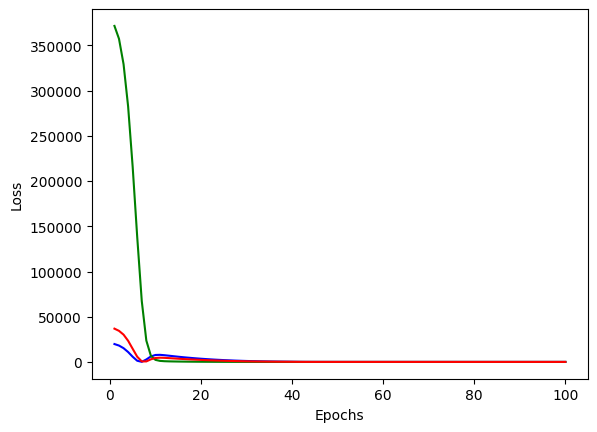

In [36]:
x = [x+1 for x in range(epochs)]

trainLossArr = []
validateLossArr = []
testLossArr = []

for i in range(epochs):
    
    # Train
    train_loss = train_loop()
    trainLossArr.append(train_loss)

    # Validate
    validate_loss = validate_loop()
    validateLossArr.append(validate_loss)

    # Test
    test_loss = test_loop()
    testLossArr.append(test_loss)

    print(f"Epoch {i+1} - Train Loss: {train_loss}, Valid Loss: {validate_loss}, Test Loss: {test_loss}")
 
# print(x)
# print(trainLossArr)
plt.plot(x, trainLossArr, 'b', label="Train")
plt.plot(x, validateLossArr, 'g', label="Valid")
plt.plot(x, testLossArr, 'r', label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()





In [37]:
# Manual Testing

x1 = torch.tensor(10, dtype=torch.float)
x2 = torch.tensor(20, dtype=torch.float)

print(x1)
print(x2)

X = torch.stack([x1, x2], dim=0)

print(X.shape)

pred = model(X)

print(pred)

tensor(10.)
tensor(20.)
torch.Size([2])
tensor([93.1169], grad_fn=<ViewBackward0>)
